## 1. Veriyi Yükleme ve Genel Bilgiler

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [92]:
df=pd.read_csv("iris.data.csv")

In [93]:
df["Iris-setosa"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [94]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## 2. Bağımlı ve Bağımsız Değişkenlerin Ayrılması

In [96]:
y=df['Iris-setosa']
x=df.drop('Iris-setosa',axis=1)


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=42)

## 3.Veriyi Ölçeklendirme

In [98]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## 4.KNeighborsClassifier ile model eğitimi

In [80]:
# KNN modelini oluştur ve eğit
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

## 5.Başarı metrikleri kullanma tahmin yaptırma

In [81]:
# Tahmin yap
y_pred = model_knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix çıktısını yazdır
print(conf_matrix)

print("Accuracy:", accuracy)

[[8 0 0]
 [0 8 1]
 [0 0 6]]
Accuracy: 0.9565217391304348


## 6. Random Forest Classifier ile model eğitimi

In [101]:
rf_model=RandomForestClassifier(n_estimators=350)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=350)

## 7.Başarı metrikleri kullanma tahmin yaptırma

In [102]:
# Tahmin yap
y_pred = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred)

# Confusion Matrix çıktısını yazdır
print(conf_matrix)

print("Accuracy:", accuracy)

[[8 0 0]
 [0 8 1]
 [0 0 6]]
Accuracy: 0.9565217391304348


## 8. seaborn ile confision matrix çizdirme

In [86]:
import seaborn as sns

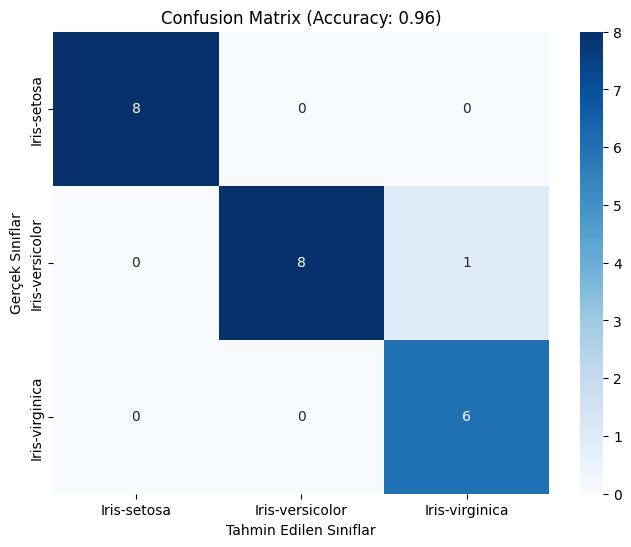

In [87]:
# Confusion Matrix Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()